In [15]:
import matplotlib.pyplot as plt
import math

In [16]:
TIME = 0
DURATION = 30 #sec
DRONE_MASS = 2000 #kg
DELTA_T = 0.01 #s
FUEL_CONSUMPTION = 0.6831 #liters
DIAMETER = 5 #m
AREA = 1 #m2 #change to 1
TOP_AREA =  math.pi * (DIAMETER/2)**2#m2
STARTING_PITCH = 15 #degrees

THRUST_DURATION = 15 #s

In [17]:
class Drone():

    def __init__(self, drone_mass, delta_t, diameter, area, thrust_duration, top_area):
        self.top_area = top_area
        self.thrust_duration = thrust_duration
        self.area =area
        self.diameter = diameter
        self.drone_mass = drone_mass
        self.delta_t = delta_t
        self.x_vel = 0
        self.y_vel = 0
        self.x_acc = 0
        self.y_acc = 0
        self.delta_x_vel = 0
        self.delta_y_vel = 0
        self.x_pos = 0
        self.y_pos = 500
        self.delta_x_pos = 0
        self.delta_y_pos = 0
        self.aoa = 0

    def thrust(self):
        thrust = 30000 #N
                
        acceleration = thrust / self.drone_mass

        self.x_acc += acceleration

        self.delta_x_vel += acceleration * self.delta_t

    def drag(self):
        density_of_air = 1.293  # kg/m^3
        cd0 = 0.08  # Base drag coefficient
        k = 0.01  # Change in drag coefficient per degree of AoA change

        # Calculate the drag coefficient including AoA effect
        drag_coefficient = 0.08

        # Calculate drag force
        drag_force = -0.5 * density_of_air * (self.x_vel ** 2) * self.area * drag_coefficient

        # Calculate acceleration due to drag
        acceleration = drag_force / self.drone_mass

        # Update the velocity
        self.delta_x_vel += acceleration * self.delta_t

        self.x_acc += acceleration


    def start_x(self):
        self.delta_x_vel = 0
        
        if self.thrust_duration > 0:
            self.thrust()
            self.thrust_duration -= self.delta_t
        else:
            print('DONE')

        self.drag()
        self.x_vel += self.delta_x_vel
        self.delta_x_pos = self.x_vel * self.delta_t
        self.x_pos += self.delta_x_pos

    def gravity(self):
        g = 9.81 #m/s2
        self.y_acc -= g
        self.delta_y_vel += -g*self.delta_t

    def lift(self):
        density_of_air = 1.293  # kg/m^3
        cl0 = 0.15  # Base lift coefficient
        k = 0.02  # Change in lift coefficient per degree of AoA change

        # Calculate the lift coefficient including AoA effect
        lift_coefficient = 0.15

        # Calculate lift force
        lift_force = 0.5 * density_of_air * (self.x_vel ** 2) * self.top_area * lift_coefficient

        # Calculate acceleration due to lift
        acceleration = lift_force / self.drone_mass

        # Update the vertical velocity
        self.delta_y_vel += acceleration * self.delta_t

        self.y_acc += acceleration

    def start_y(self):
        if self.y_pos <= 0:
            self.y_vel = 0
            self.x_vel = 0

        self.delta_y_vel = 0
        self.lift()
        self.gravity()
        self.y_vel += self.delta_y_vel
        self.delta_y_pos = self.y_vel * self.delta_t
        self.y_pos += self.delta_y_pos

    def start(self):
        self.x_acc = 0
        self.y_acc = 0
        self.start_x()
        self.start_y()



In [18]:
TIME = 0
y_velocities = []
x_velocities = []
times = []
x_positions = []
y_positions = []

drone = Drone(DRONE_MASS, DELTA_T, DIAMETER, AREA, THRUST_DURATION, TOP_AREA)

for t in range(0, int(DURATION/DELTA_T)):
    drone.start()
    x_velocities.append(drone.x_vel)
    y_velocities.append(drone.y_vel)
    x_positions.append(drone.x_pos)
    y_positions.append(drone.y_pos)
    TIME += DELTA_T
    times.append(TIME)
    print(drone.x_vel, drone.y_vel, drone.x_acc, drone.y_acc, TIME)


0.15 -0.09809978578878686 15.0 -9.809978578878686 0.01
0.29999999418150003 -0.19619892894396754 14.99999941815 -9.809914315518066 0.02
0.44999997090750093 -0.29429700104329853 14.99999767260009 -9.8098072099331 0.03
0.5999999185410076 -0.39239357366481886 14.999994763350678 -9.809657262152035 0.04
0.7499998254450329 -0.4904882183869831 14.999990690402528 -9.809464472216419 0.05
0.8999996799826006 -0.588580506788794 14.999985453756771 -9.809228840181094 0.060000000000000005
1.0499994705167495 -0.686670010449936 14.999979053414895 -9.808950366114196 0.07
1.199999185410537 -0.7847563009509075 14.999971489378755 -9.808629050097153 0.08
1.3499988130270426 -0.8828389498731545 14.999962761650556 -9.808264892224692 0.09
1.4999983417293714 -0.9809175287992028 14.999952870232876 -9.807857892604831 0.09999999999999999
1.6499977598806579 -1.0789916093127916 14.999941815128649 -9.807408051358887 0.10999999999999999
1.7999970558440697 -1.1770607629990062 14.999929596341167 -9.806915368621466 0.11999

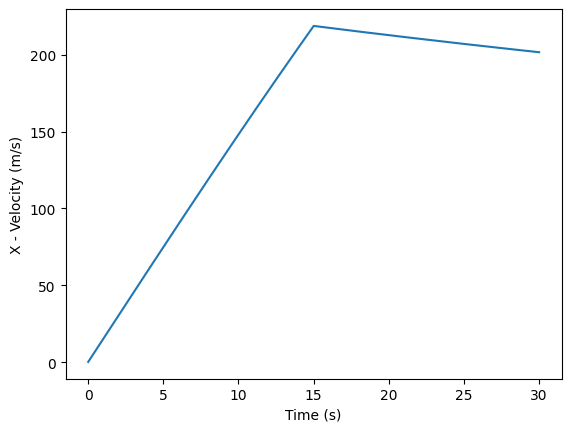

In [19]:
plt.plot(times, x_velocities)
plt.xlabel('Time (s)')
plt.ylabel('X - Velocity (m/s)')
plt.show()

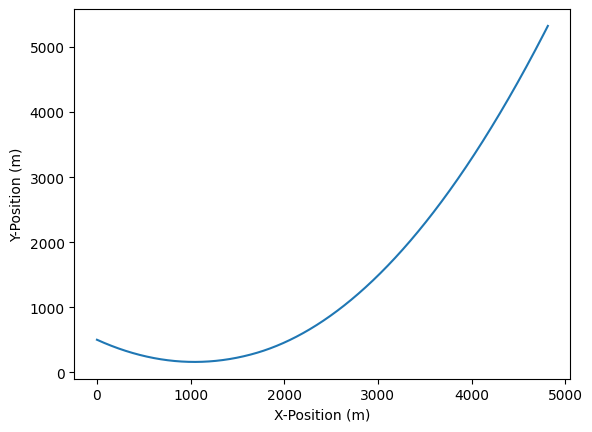

In [20]:
plt.plot(x_positions, y_positions)
plt.xlabel('X-Position (m)')
plt.ylabel('Y-Position (m)')
plt.show()

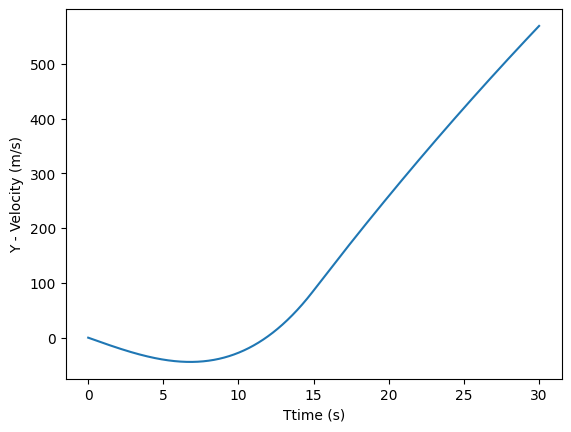

In [21]:
plt.plot(times, y_velocities)
plt.xlabel('Ttime (s)')
plt.ylabel('Y - Velocity (m/s)')
plt.show()